<a href="https://colab.research.google.com/github/Subhradyuti/Coca-Cola-Stock-Analysis/blob/main/Coca_Cola_Stock_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.  Analyzing Coca-Cola Stock Time Series:**
# **LSTM vs. LSTM with Attention, RNN, and GRU Predictions**


> Date: December 23, 2023

1.   Introduction: In this document, we delve into the time series analysis of Coca-Cola stock data, comparing the predictive capabilities of Long Short-Term Memory networks (LSTM), LSTM with attention mechanism, Recurrent Neural Networks (RNN), and Gated Recurrent Units (GRU). Our focus is on evaluating and visualizing the performance of these models in predicting Coca-Cola stock prices.


**1.1 Time Series Prediction**

The objective of this project is to use time series from a set of Coca Cola data and then to sample
predict the closing quantities using an LSTM, LSTM + Attention model, RNN AND GRU

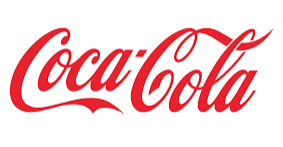

**1.1.1 Importing Libraries** ⏬

In [6]:
pip install keras-self-attention


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN,GRU
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.simplefilter('ignore')

**1.1.2 Data Preprocesing**

In [61]:
df = pd.read_csv(r'/content/COCO COLA.csv')
df = df[df['Date'] >= '2021-01-01'] ## Filter Data from January 1, 2021, Onwards
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
14853,2021-01-04,54.270000,54.630001,52.029999,52.759998,51.147507,25611100
14854,2021-01-05,52.330002,52.619999,52.029999,52.180000,50.585243,20323800
14855,2021-01-06,51.970001,52.020000,50.189999,50.520000,48.975979,38724500
14856,2021-01-07,50.090000,50.259998,49.520000,49.959999,48.433086,53225700
14857,2021-01-08,50.029999,51.130001,49.840000,51.080002,49.518860,29674000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 14853 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       243 non-null    object 
 1   Open       243 non-null    float64
 2   High       243 non-null    float64
 3   Low        243 non-null    float64
 4   Close      243 non-null    float64
 5   Adj Close  243 non-null    float64
 6   Volume     243 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.2+ KB


- The dataset consists of 243 entries (rows) and 7 columns.

- The columns are named 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume'.

- There are no missing values in any of the columns.

- The 'Date' column is of object type, which usually indicates it needs to be converted to a datetime type for time-based analysis.

- The other columns ('Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume') are of numeric types (float64 for price-related columns and int64 for 'Volume').

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,53.940864,54.276214,53.591564,53.922016,52.991930,1.598239e+07
std,2.456340,2.412470,2.477056,2.466068,2.765730,7.625339e+06
min,48.270000,48.689999,48.110001,48.150002,46.678406,6.169200e+06
25%,52.750000,53.195000,52.415001,52.674999,51.866487,1.170495e+07
50%,54.340000,54.610001,54.049999,54.340000,53.524921,1.418570e+07
75%,55.905001,56.205000,55.549999,55.895000,55.127720,1.775260e+07
max,58.490002,58.919998,57.900002,58.650002,58.650002,6.784570e+07


The stock prices for Coca Cola during this period exhibit moderate variability, and the trading volume varies widely. Further analysis and visualization can provide a more detailed understanding of the stock's behavior over time.

In [11]:
df.mean()

Open         5.394086e+01
High         5.427621e+01
Low          5.359156e+01
Close        5.392202e+01
Adj Close    5.299193e+01
Volume       1.598239e+07
dtype: float64

In [12]:
df.median()

Open         5.434000e+01
High         5.461000e+01
Low          5.405000e+01
Close        5.434000e+01
Adj Close    5.352492e+01
Volume       1.418570e+07
dtype: float64

In [13]:
df.skew()

Open        -0.638463
High        -0.635764
Low         -0.625883
Close       -0.632032
Adj Close   -0.654731
Volume       3.314888
dtype: float64

In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
df.shape

(243, 7)

**1.1.3 Exploratory Data Analysis**📊📉

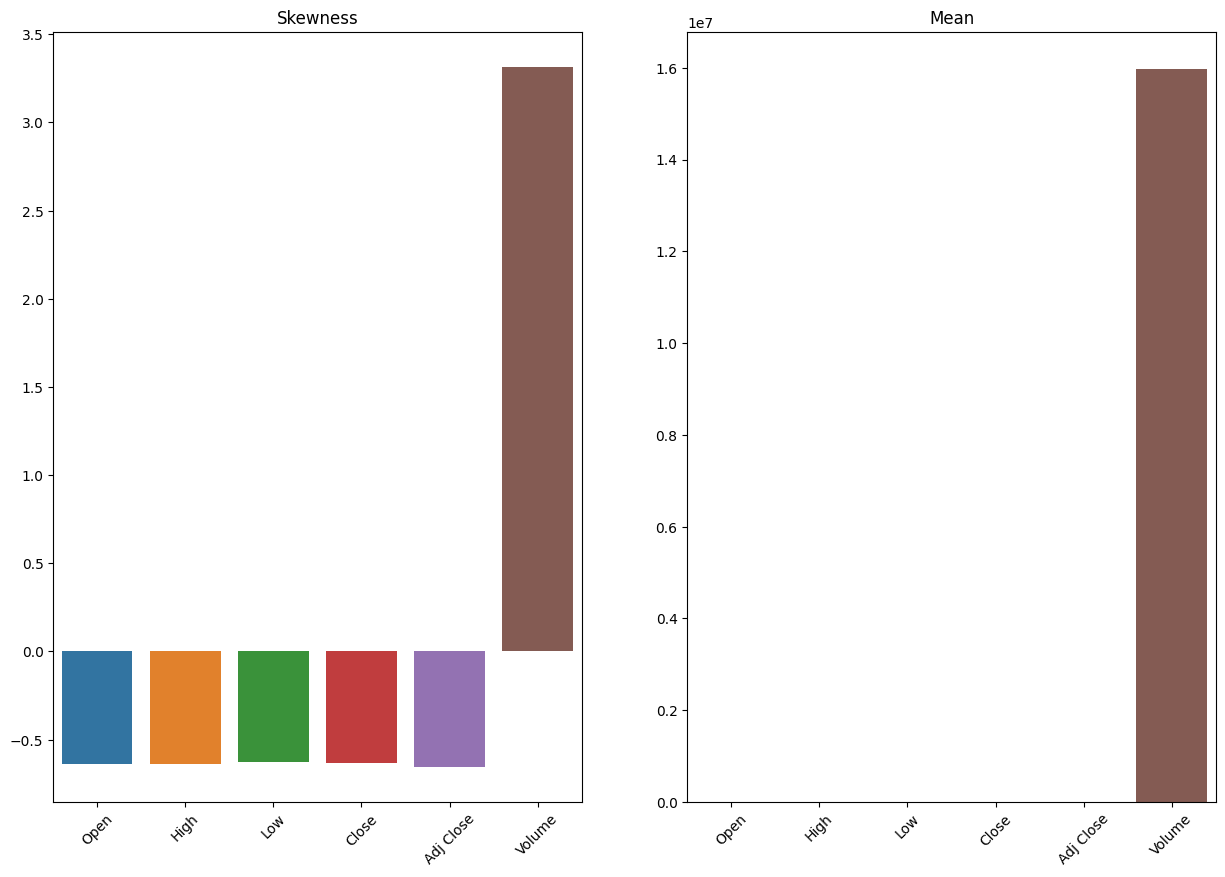

In [17]:
skewness_values = df.skew()
mean_values = df.mean()
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.barplot(x=skewness_values.index, y=skewness_values.values, ax=ax[0])
ax[0].set_title('Skewness')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x=mean_values.index, y=mean_values.values, ax=ax[1])
ax[1].set_title('Mean')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

**Skewness Plot**: It visualizes the skewness of each column in the dataset. Skewness measures the asymmetry of the distribution of each variable. If the skewness is close to 0, the distribution is approximately symmetric. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

**Mean Plot**: It shows the mean value of each column. The mean is a measure of central tendency, representing the average value of each variable.

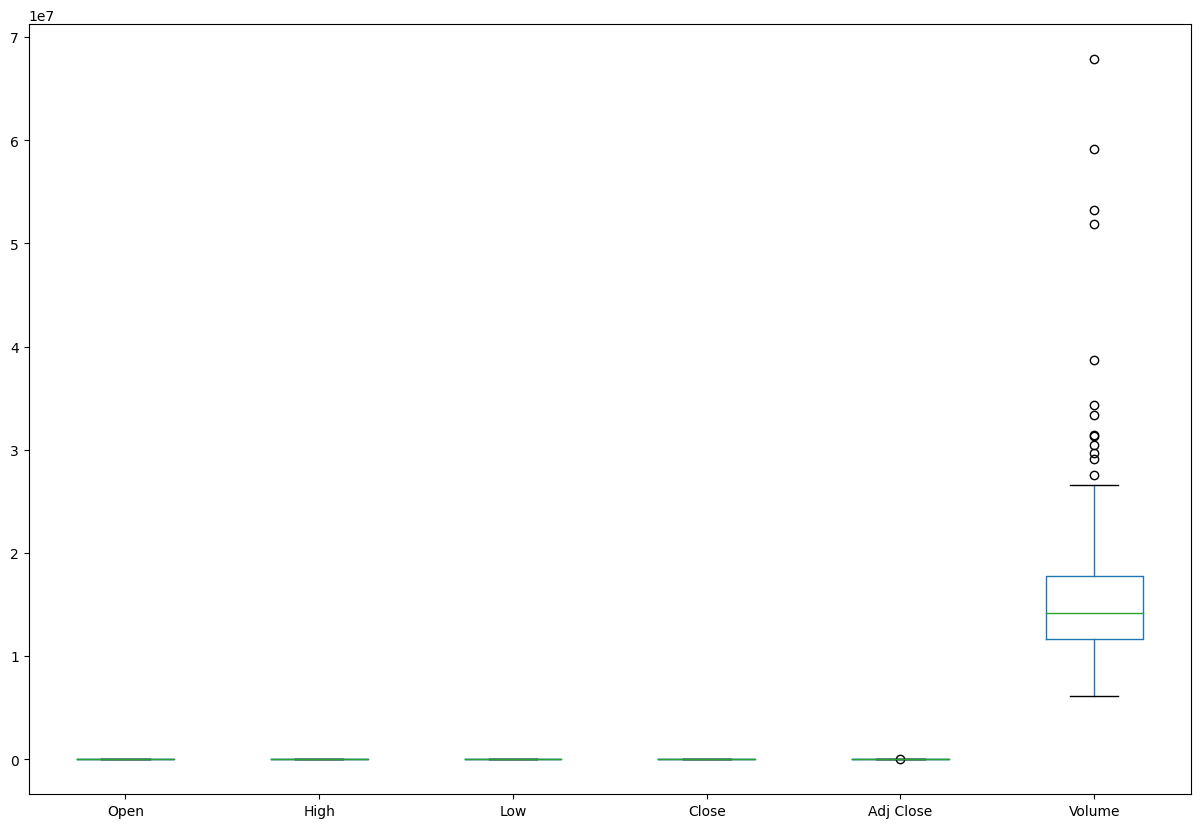

In [18]:
df.boxplot(figsize =(15,10), grid = False)
plt.show()

Identify outliers: Points beyond the whiskers may indicate potential outliers in the data.

Assess the spread: The height of the box and the length of the whiskers provide insights into the spread and variability of the data.

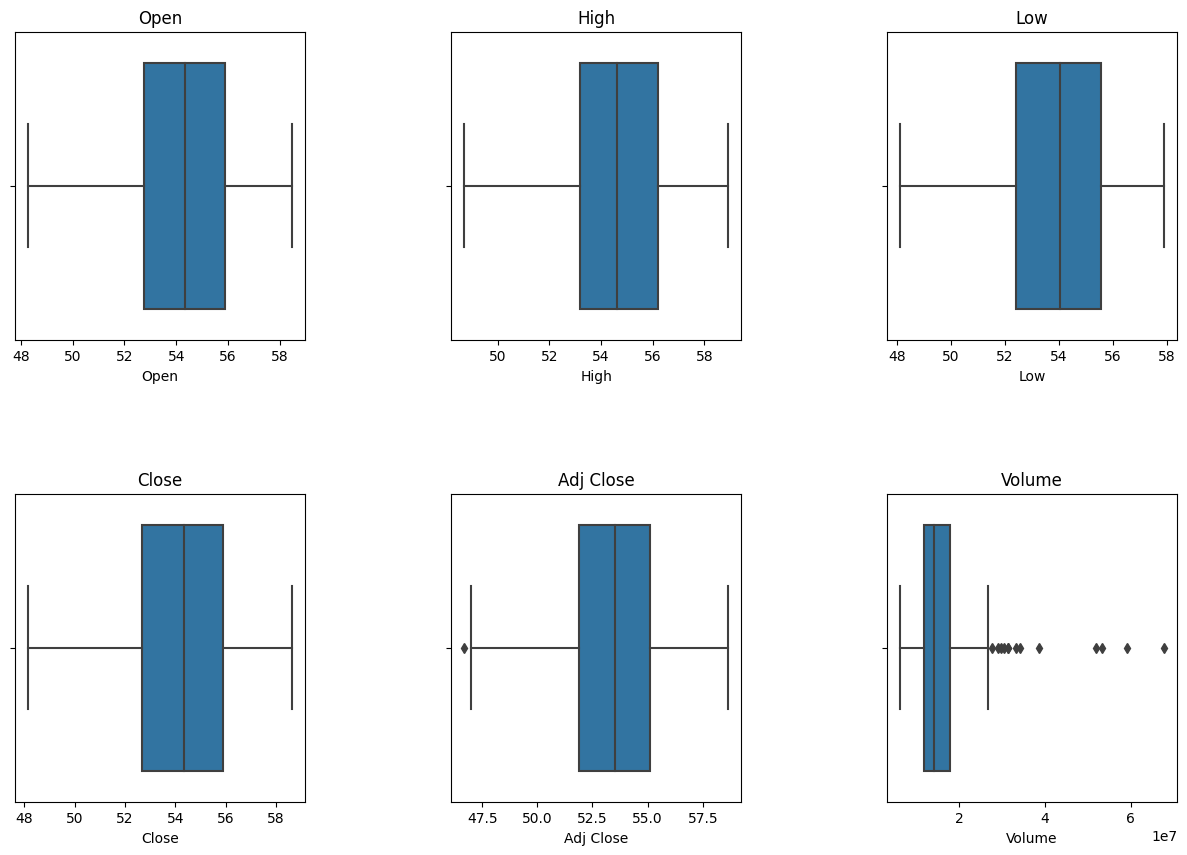

In [19]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row

    sns.boxplot(data=df, x=column, ax=ax[current_row, current_column])
    ax[current_row, current_column].set_title(column)

plt.show()

Evaluate distribution: Examine the shape, spread, and central tendency of each variable.

Identify outliers: Look for points beyond the whiskers, indicating potential outliers.

Compare variables: Observe relative scales and distributions across different columns.

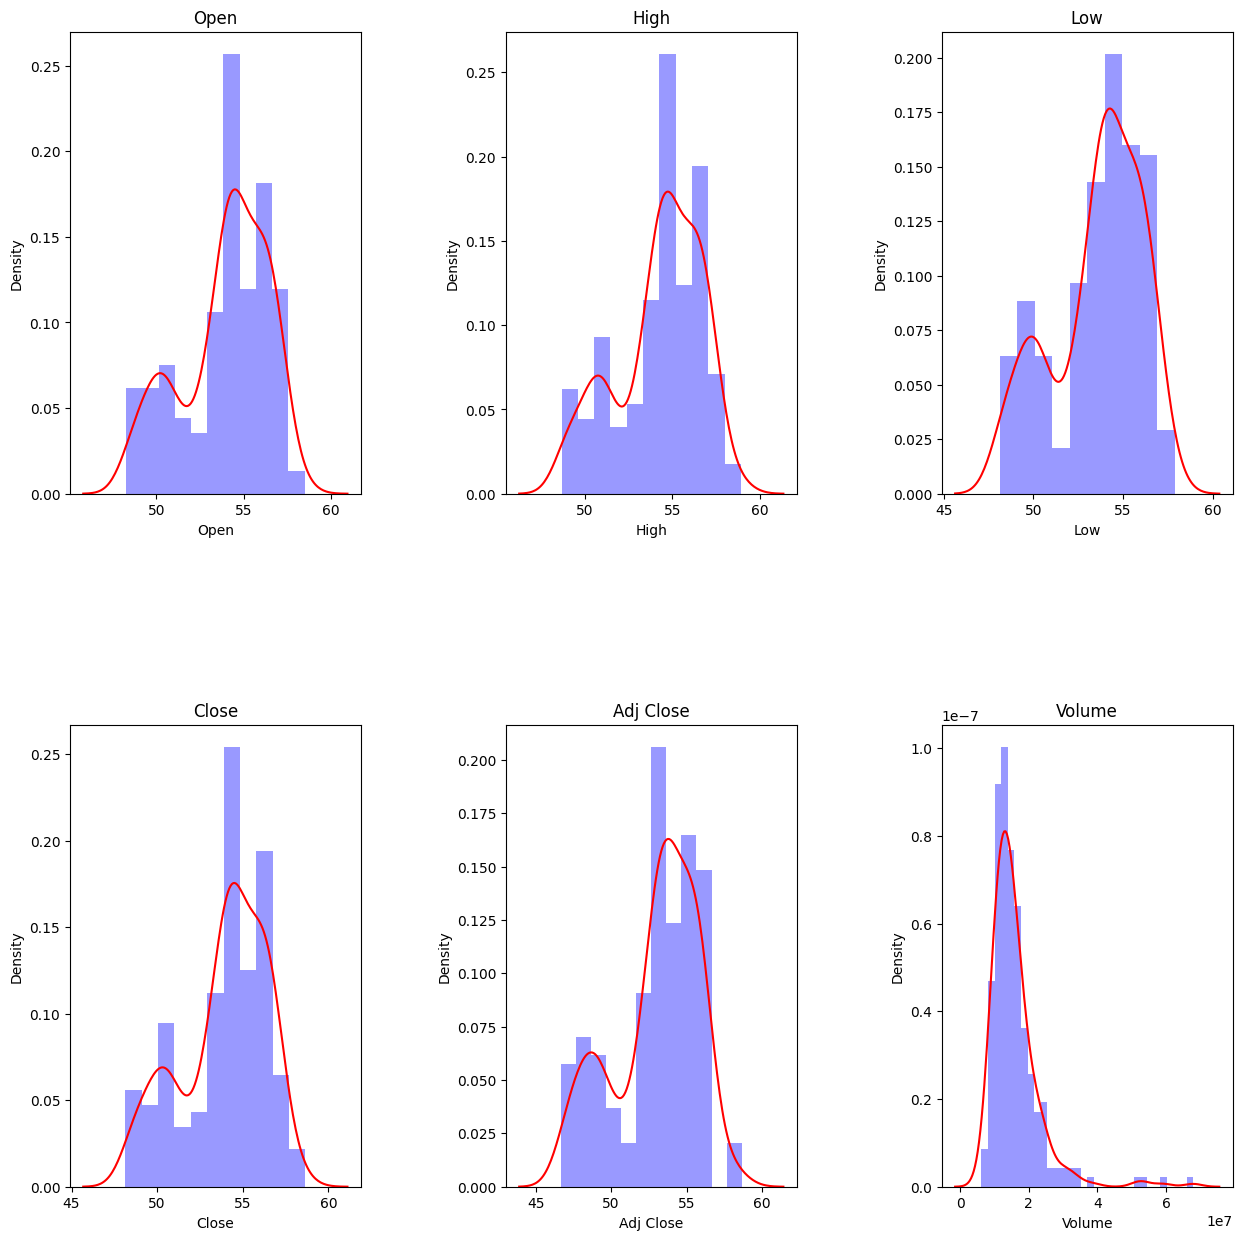

In [20]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row

    sns.distplot(df[column], ax=ax[current_row, current_column], color='red', hist_kws={'color': 'blue'})
    ax[current_row, current_column].set_title(column)

plt.show()



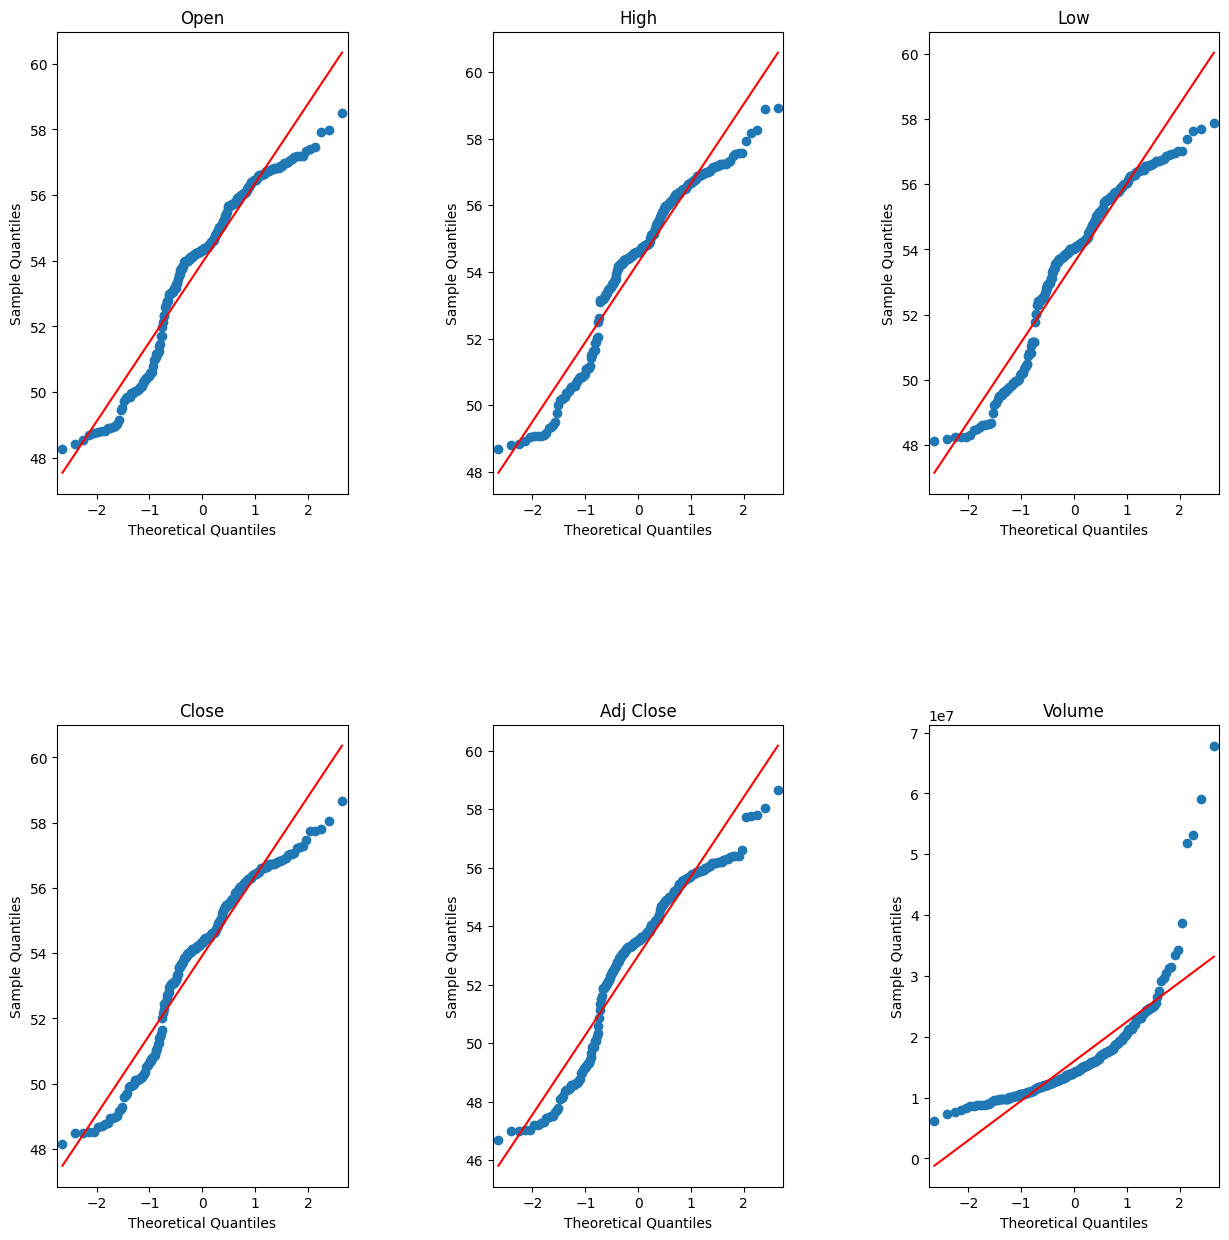

In [21]:
columns_per_row = 3
num_columns = len(df.describe().columns)
num_rows = -(-num_columns // columns_per_row)

fig, ax = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(df.describe().columns):
    current_row = i // columns_per_row
    current_column = i % columns_per_row

    smi.qqplot(df[column], ax=ax[current_row, current_column], line="r")
    ax[current_row, current_column].set_title(column)

plt.show()


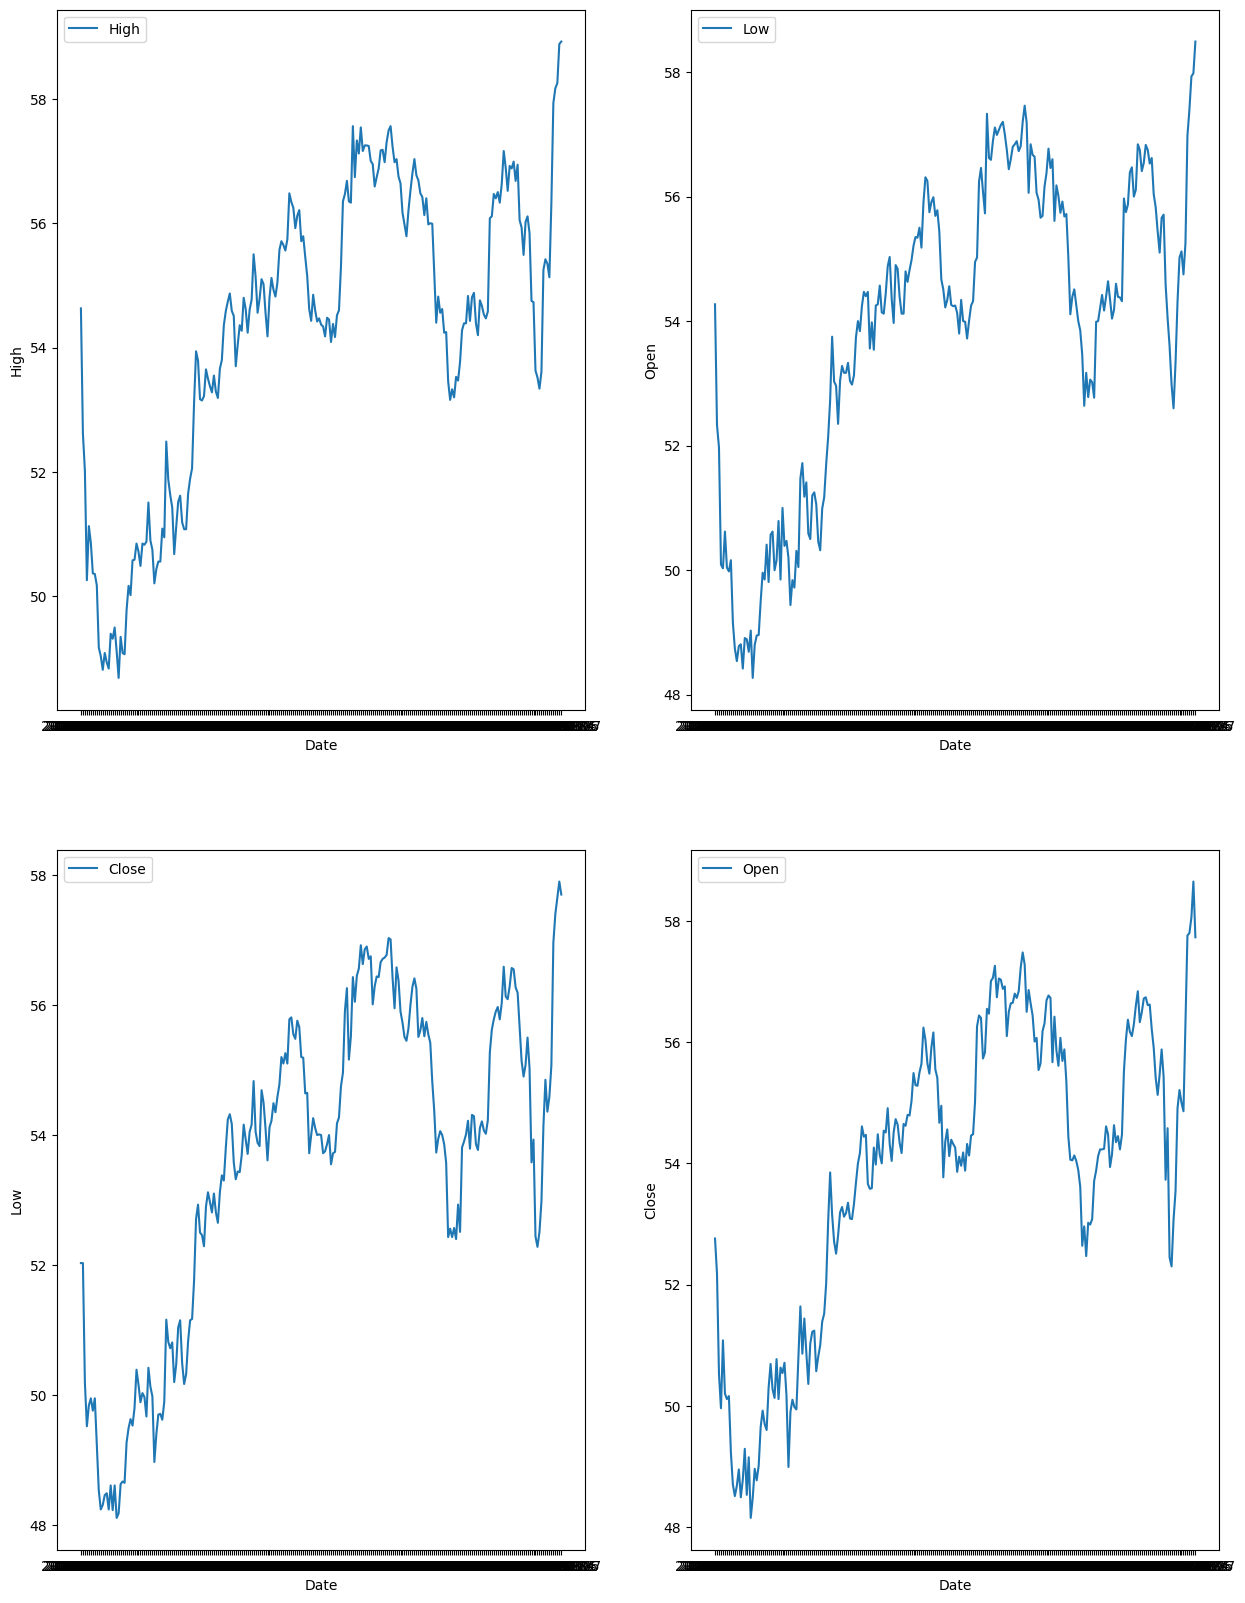

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 20))

# Plotting 'High' in the top-left subplot (ax[0, 0])
sns.lineplot(data=df, x='Date', y='High', label='High', ax=ax[0, 0])

# Plotting 'Open' in the top-right subplot (ax[0, 1])
sns.lineplot(data=df, x='Date', y='Open', label='Low', ax=ax[0, 1])

# Plotting 'Low' in the bottom-left subplot (ax[1, 0])
sns.lineplot(data=df, x='Date', y='Low', label='Close', ax=ax[1, 0])

# Plotting 'Close' in the bottom-right subplot (ax[1, 1])
sns.lineplot(data=df, x='Date', y='Close', label='Open', ax=ax[1, 1])

# Display the subplots
plt.show()


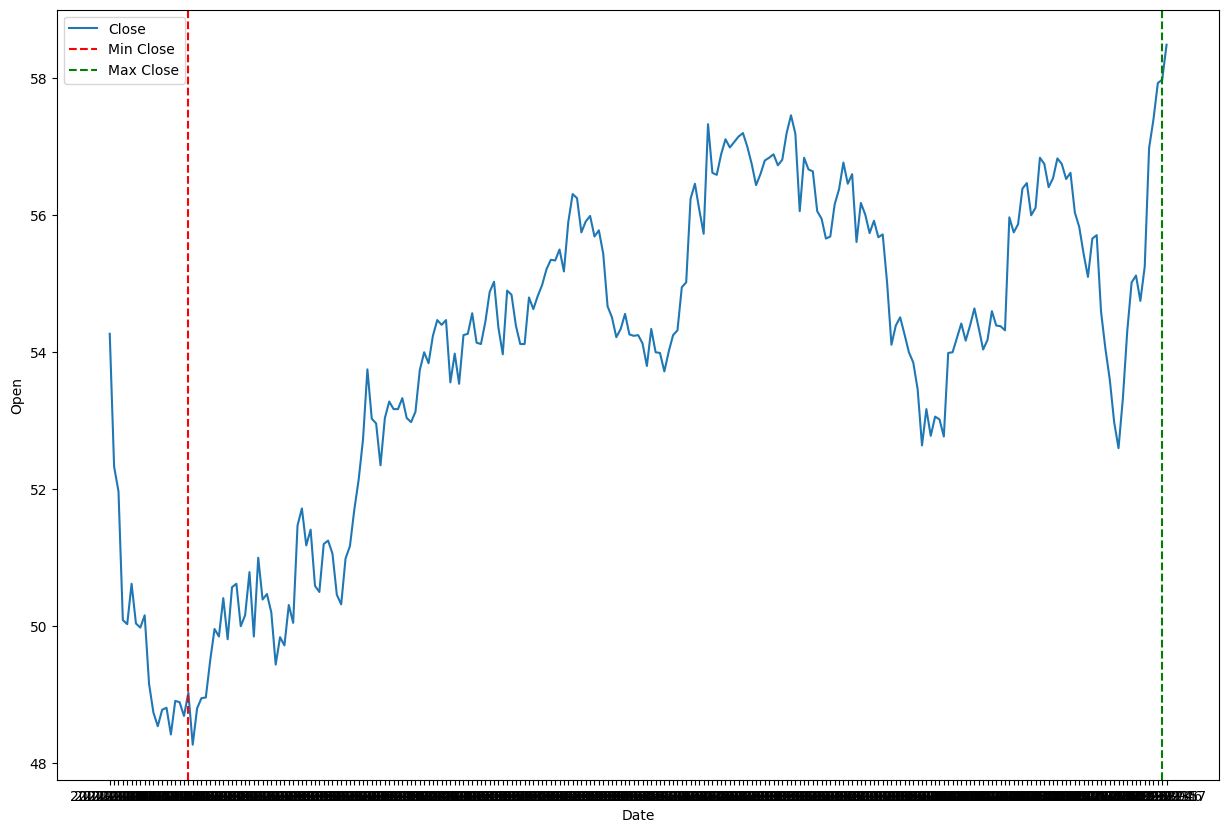

In [23]:
plt.figure(figsize=(15, 10))

# Plotting the line chart for 'Open' prices over time
sns.lineplot(data=df, x='Date', y='Open', label='Close')

# Finding the index of the minimum and maximum 'Close' prices
min_index = df['Close'].idxmin()
max_index = df['Close'].idxmax()

# Retrieving the dates corresponding to the minimum and maximum 'Close' prices
min_date = df.loc[min_index, 'Date']
max_date = df.loc[max_index, 'Date']

# Adding vertical dashed lines for the dates with minimum and maximum 'Close' prices
plt.axvline(x=min_date, color='r', linestyle='--', label='Min Close')
plt.axvline(x=max_date, color='g', linestyle='--', label='Max Close')

# Displaying the legend to differentiate lines
plt.legend()

# Displaying the plot
plt.show()


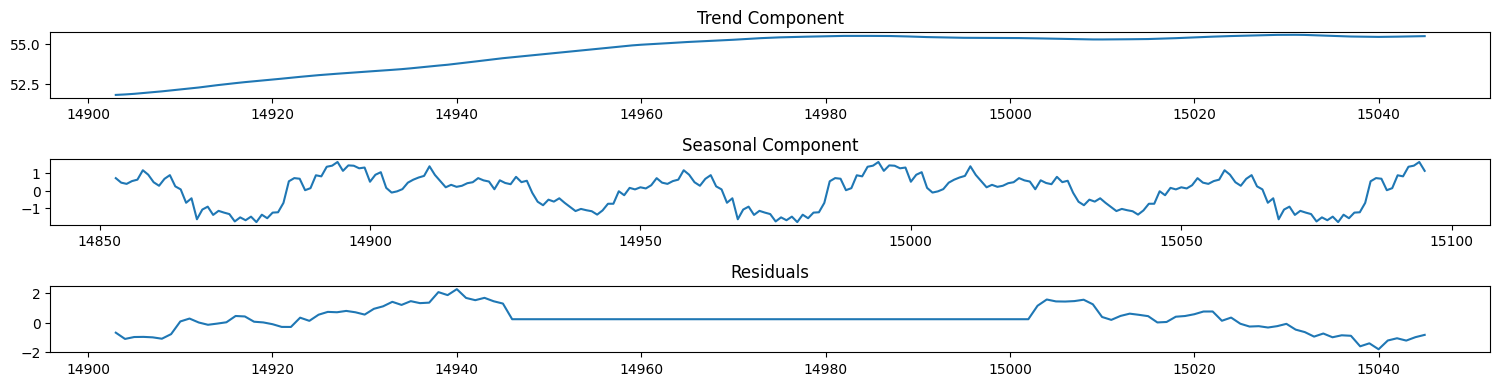

In [24]:
# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition on the 'Close' prices
# Choose an appropriate period based on the characteristics of your data
result = seasonal_decompose(df['Close'], model='additive', period=100)

# Create a figure with a specified size
plt.figure(figsize=(15, 5))

# Plot the Trend Component in the first subplot
plt.subplot(4, 1, 1)
plt.plot(result.trend, label='Trend')
plt.title('Trend Component')

# Plot the Seasonal Component in the second subplot
plt.subplot(4, 1, 2)
plt.plot(result.seasonal, label='Seasonal')
plt.title('Seasonal Component')

# Plot the Residuals in the third subplot
plt.subplot(4, 1, 3)
plt.plot(result.resid, label='Residuals')
plt.title('Residuals')

# Adjust the layout to prevent overlapping subplots
plt.tight_layout()

# Display the plot
plt.show()


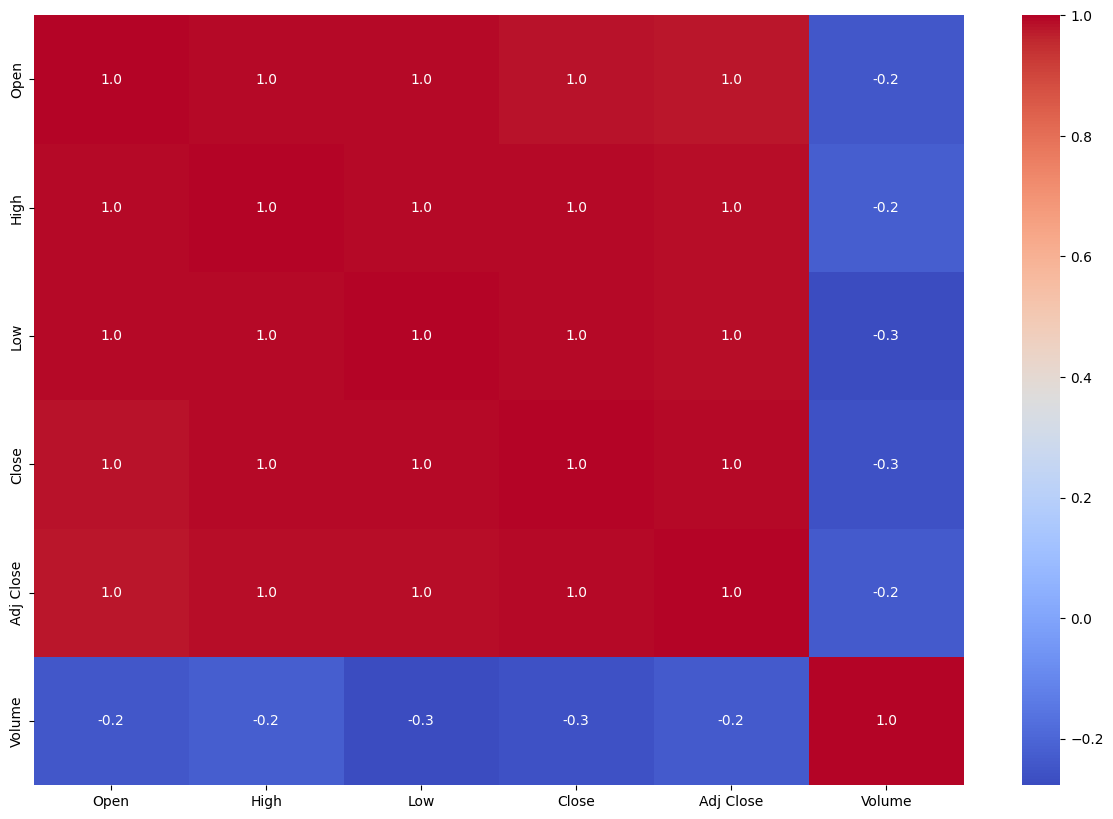

In [25]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap of the correlation matrix for the DataFrame
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm')

# Display the heatmap
plt.show()


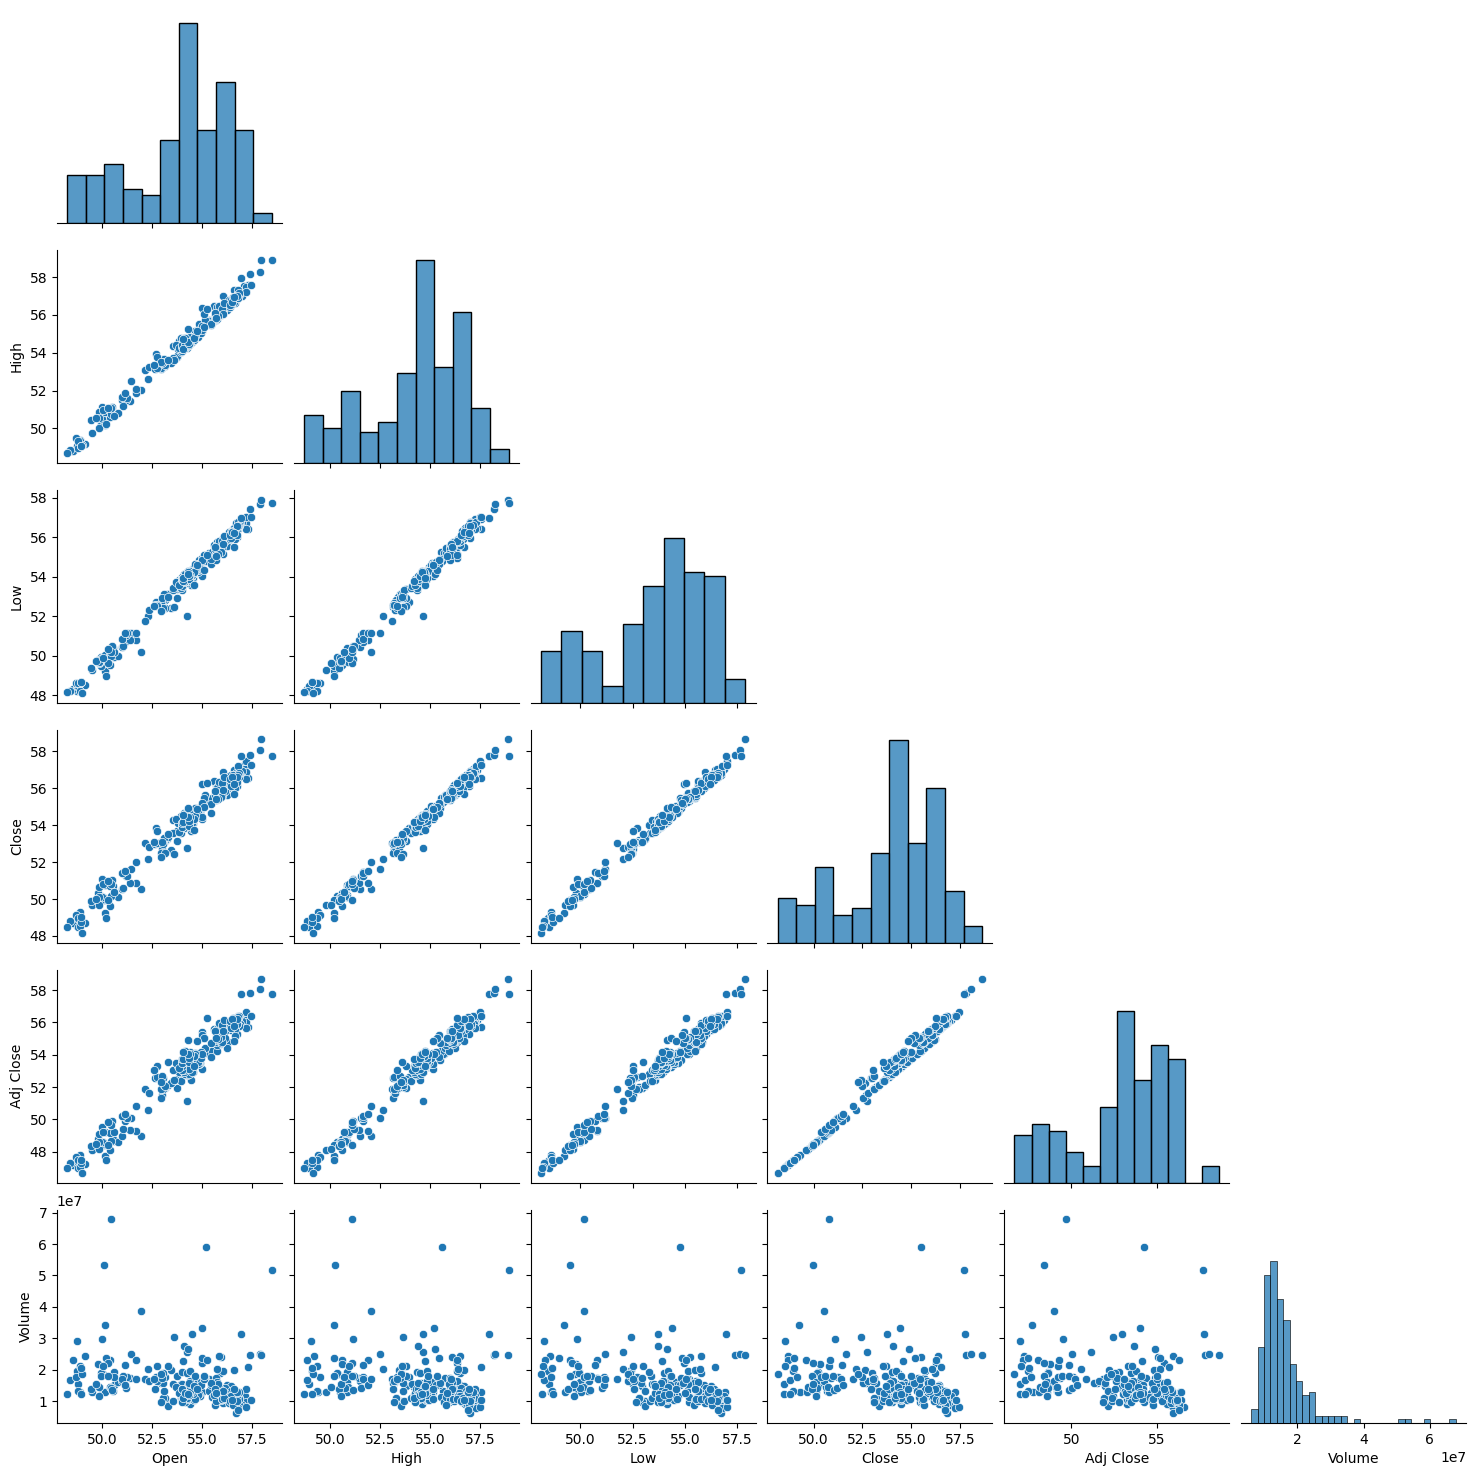

In [26]:
sns.pairplot(df,corner=True)
plt.show()

**1.1.4 Time Series Modeling and Evaluation**

**1.1.5 Parameters**

In [27]:
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [28]:
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length, 0]
        label = data[i + seq_length, 0]

        sequences.append(sequence)
        labels.append(label)

    return np.array(sequences), np.array(labels)


In [29]:
seq_length = 4
n_samples = len(data_scaled)

# Create sequences and labels using the provided function
sequences, labels = create_sequences(data_scaled, seq_length)

# Split the data into training and testing sets
split = int(0.8 * len(sequences))
X_train, y_train = sequences[:split], labels[:split]
X_test, y_test = sequences[split:], labels[split:]


### 1.1.6 LSTM

In [30]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model_lstm.add(LSTM(50, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [31]:
model_lstm.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
predictions_lstm = model_lstm.predict(X_test)


Epoch 1/40
6/6 [==============================] - 7s 123ms/step - loss: 0.3132 - val_loss: 0.4391
Epoch 2/40
6/6 [==============================] - 0s 16ms/step - loss: 0.2583 - val_loss: 0.3629
Epoch 3/40
6/6 [==============================] - 0s 15ms/step - loss: 0.2012 - val_loss: 0.2700
Epoch 4/40
6/6 [==============================] - 0s 14ms/step - loss: 0.1370 - val_loss: 0.1604
Epoch 5/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0648 - val_loss: 0.0494
Epoch 6/40
6/6 [==============================] - 0s 20ms/step - loss: 0.0172 - val_loss: 0.0118
Epoch 7/40
6/6 [==============================] - 0s 17ms/step - loss: 0.0260 - val_loss: 0.0125
Epoch 8/40
6/6 [==============================] - 0s 16ms/step - loss: 0.0153 - val_loss: 0.0161
Epoch 9/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0129 - val_loss: 0.0237
Epoch 10/40
6/6 [==============================] - 0s 19ms/step - loss: 0.0125 - val_loss: 0.0159
Epoch 11/40
6/6 [===========

In [32]:
predictions_lstm = scaler.inverse_transform(predictions_lstm)
y_test_actual_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))


In [33]:
dates_test = df['Date'].iloc[split + seq_length:]
df_plot_lstm = pd.DataFrame({'Dates': dates_test, 'Real': y_test_actual_lstm.flatten(), 'Predict': predictions_lstm.flatten()})
df_plot_lstm.head(1)


,Dates,Real,Predict
15048,2021-10-12,54.23,53.950943


### 1.1.7 LSTM + ATTENTION

In [34]:
model_lstm_attention = Sequential()

# Add the first LSTM layer with 100 units, ReLU activation, and input shape
model_lstm_attention.add(LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))

# Add the self-attention layer with ReLU activation
model_lstm_attention.add(SeqSelfAttention(attention_activation='relu'))

# Add the second LSTM layer with 50 units and ReLU activation
model_lstm_attention.add(LSTM(50, activation='relu', return_sequences=False))

# Add a Dense layer with 1 unit
model_lstm_attention.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss
model_lstm_attention.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [35]:
model_lstm_attention.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
predictions_scaled_lstm_attention = model_lstm_attention.predict(X_test)


Epoch 1/40
6/6 [==============================] - 4s 108ms/step - loss: 0.3141 - val_loss: 0.4538
Epoch 2/40
6/6 [==============================] - 0s 15ms/step - loss: 0.2764 - val_loss: 0.4041
Epoch 3/40
6/6 [==============================] - 0s 18ms/step - loss: 0.2384 - val_loss: 0.3393
Epoch 4/40
6/6 [==============================] - 0s 25ms/step - loss: 0.1889 - val_loss: 0.2507
Epoch 5/40
6/6 [==============================] - 0s 27ms/step - loss: 0.1200 - val_loss: 0.1277
Epoch 6/40
6/6 [==============================] - 0s 26ms/step - loss: 0.0387 - val_loss: 0.0104
Epoch 7/40
6/6 [==============================] - 0s 25ms/step - loss: 0.0221 - val_loss: 0.0190
Epoch 8/40
6/6 [==============================] - 0s 24ms/step - loss: 0.0129 - val_loss: 0.0208
Epoch 9/40
6/6 [==============================] - 0s 23ms/step - loss: 0.0141 - val_loss: 0.0240
Epoch 10/40
6/6 [==============================] - 0s 31ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 11/40
6/6 [===========

In [36]:
predictions_lstm_attention = scaler.inverse_transform(predictions_scaled_lstm_attention)
y_test_lstm_attention = scaler.inverse_transform(y_test.reshape(-1, 1))


In [37]:
df_plot_lstm_attention = pd.DataFrame({'Dates': dates_test, 'Real': y_test_lstm_attention.flatten(), 'Predict': predictions_lstm_attention.flatten()})
df_plot_lstm_attention.head(1)

,Dates,Real,Predict
15048,2021-10-12,54.23,53.95327


### 1.1.8 RNN

In [38]:
model_rnn = Sequential()

# Add the first SimpleRNN layer with 100 units, ReLU activation, and input shape
model_rnn.add(SimpleRNN(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))

# Add the self-attention layer with ReLU activation (Note: This line seems incorrect, and I assume it should be removed)
# model_rnn.add(SeqSelfAttention(attention_activation='relu'))

# Add the second SimpleRNN layer with 50 units and ReLU activation
model_rnn.add(SimpleRNN(50, activation='relu'))

# Add a Dense layer with 1 unit
model_rnn.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [39]:
model_rnn.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
predictions_scaled_rnn = model_rnn.predict(X_test)


Epoch 1/40
6/6 [==============================] - 2s 81ms/step - loss: 0.0394 - val_loss: 0.0239
Epoch 2/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0140 - val_loss: 0.0081
Epoch 3/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0056 - val_loss: 0.0154
Epoch 4/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0080
Epoch 5/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0035 - val_loss: 0.0070
Epoch 6/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0069
Epoch 7/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 8/40
6/6 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0066
Epoch 9/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 10/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0053
Epoch 11/40
6/6 [============

In [40]:
predictions_rnn = scaler.inverse_transform(predictions_scaled_rnn)
y_test_rnn = scaler.inverse_transform(y_test.reshape(-1, 1))


In [41]:
df_plot_rnn = pd.DataFrame({'Dates': dates_test, 'Real': y_test_rnn.flatten(), 'Predict': predictions_rnn.flatten()})
df_plot_rnn.head(1)


,Dates,Real,Predict
15048,2021-10-12,54.23,54.133804


### 1.1.9 GRU

In [42]:
model_gru = Sequential()

# Add the first GRU layer with 100 units, ReLU activation, and input shape
model_gru.add(GRU(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))

# Add the second GRU layer with 50 units and ReLU activation
model_gru.add(GRU(50, activation='relu'))

# Add a Dense layer with 1 unit
model_gru.add(Dense(1))

# Compile the model using the Adam optimizer and mean squared error loss
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [43]:
model_gru.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))
predictions_scaled_gru = model_gru.predict(X_test)


Epoch 1/40
6/6 [==============================] - 3s 90ms/step - loss: 0.2508 - val_loss: 0.3151
Epoch 2/40
6/6 [==============================] - 0s 17ms/step - loss: 0.1626 - val_loss: 0.1894
Epoch 3/40
6/6 [==============================] - 0s 15ms/step - loss: 0.0807 - val_loss: 0.0662
Epoch 4/40
6/6 [==============================] - 0s 16ms/step - loss: 0.0220 - val_loss: 0.0089
Epoch 5/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0237 - val_loss: 0.0116
Epoch 6/40
6/6 [==============================] - 0s 16ms/step - loss: 0.0196 - val_loss: 0.0114
Epoch 7/40
6/6 [==============================] - 0s 17ms/step - loss: 0.0127 - val_loss: 0.0230
Epoch 8/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0124 - val_loss: 0.0165
Epoch 9/40
6/6 [==============================] - 0s 14ms/step - loss: 0.0085 - val_loss: 0.0092
Epoch 10/40
6/6 [==============================] - 0s 13ms/step - loss: 0.0063 - val_loss: 0.0090
Epoch 11/40
6/6 [============

In [44]:
predictions_gru = scaler.inverse_transform(predictions_scaled_gru)
y_test_gru = scaler.inverse_transform(y_test.reshape(-1, 1))


In [45]:
df_plot_gru = pd.DataFrame({'Dates': dates_test, 'Real': y_test_gru.flatten(), 'Predict': predictions_gru.flatten()})
df_plot_gru.head(1)


,Dates,Real,Predict
15048,2021-10-12,54.23,54.177521


### **1.1.10 Visualization**

In [46]:
# Calculate Mean Squared Error (MSE) for LSTM model
mse_lstm = mean_squared_error(df_plot_lstm['Real'], df_plot_lstm['Predict'])

# Calculate Mean Squared Error (MSE) for LSTM with attention model
mse_lstm_attention = mean_squared_error(df_plot_lstm_attention['Real'], df_plot_lstm_attention['Predict'])

# Calculate Mean Squared Error (MSE) for RNN model
mse_rnn = mean_squared_error(df_plot_rnn['Real'], df_plot_rnn['Predict'])

# Calculate Mean Squared Error (MSE) for GRU model
mse_gru = mean_squared_error(df_plot_gru['Real'], df_plot_gru['Predict'])

# Calculate R-squared (R2) for LSTM model
r2_lstm = r2_score(df_plot_lstm['Real'], df_plot_lstm['Predict'])

# Calculate R-squared (R2) for LSTM with attention model
r2_lstm_attention = r2_score(df_plot_lstm_attention['Real'], df_plot_lstm_attention['Predict'])

# Calculate R-squared (R2) for RNN model
r2_rnn = r2_score(df_plot_rnn['Real'], df_plot_rnn['Predict'])

# Calculate R-squared (R2) for GRU model
r2_gru = r2_score(df_plot_gru['Real'], df_plot_gru['Predict'])

# Calculate Root Mean Squared Error (RMSE) for LSTM model
rmse_lstm = mean_squared_error(df_plot_lstm['Real'], df_plot_lstm['Predict'], squared=False)

# Calculate Root Mean Squared Error (RMSE) for LSTM with attention model
rmse_lstm_attention = mean_squared_error(df_plot_lstm_attention['Real'], df_plot_lstm_attention['Predict'], squared=False)

# Calculate Root Mean Squared Error (RMSE) for RNN model
rmse_rnn = mean_squared_error(df_plot_rnn['Real'], df_plot_rnn['Predict'], squared=False)

# Calculate Root Mean Squared Error (RMSE) for GRU model
rmse_gru = mean_squared_error(df_plot_gru['Real'], df_plot_gru['Predict'], squared=False)


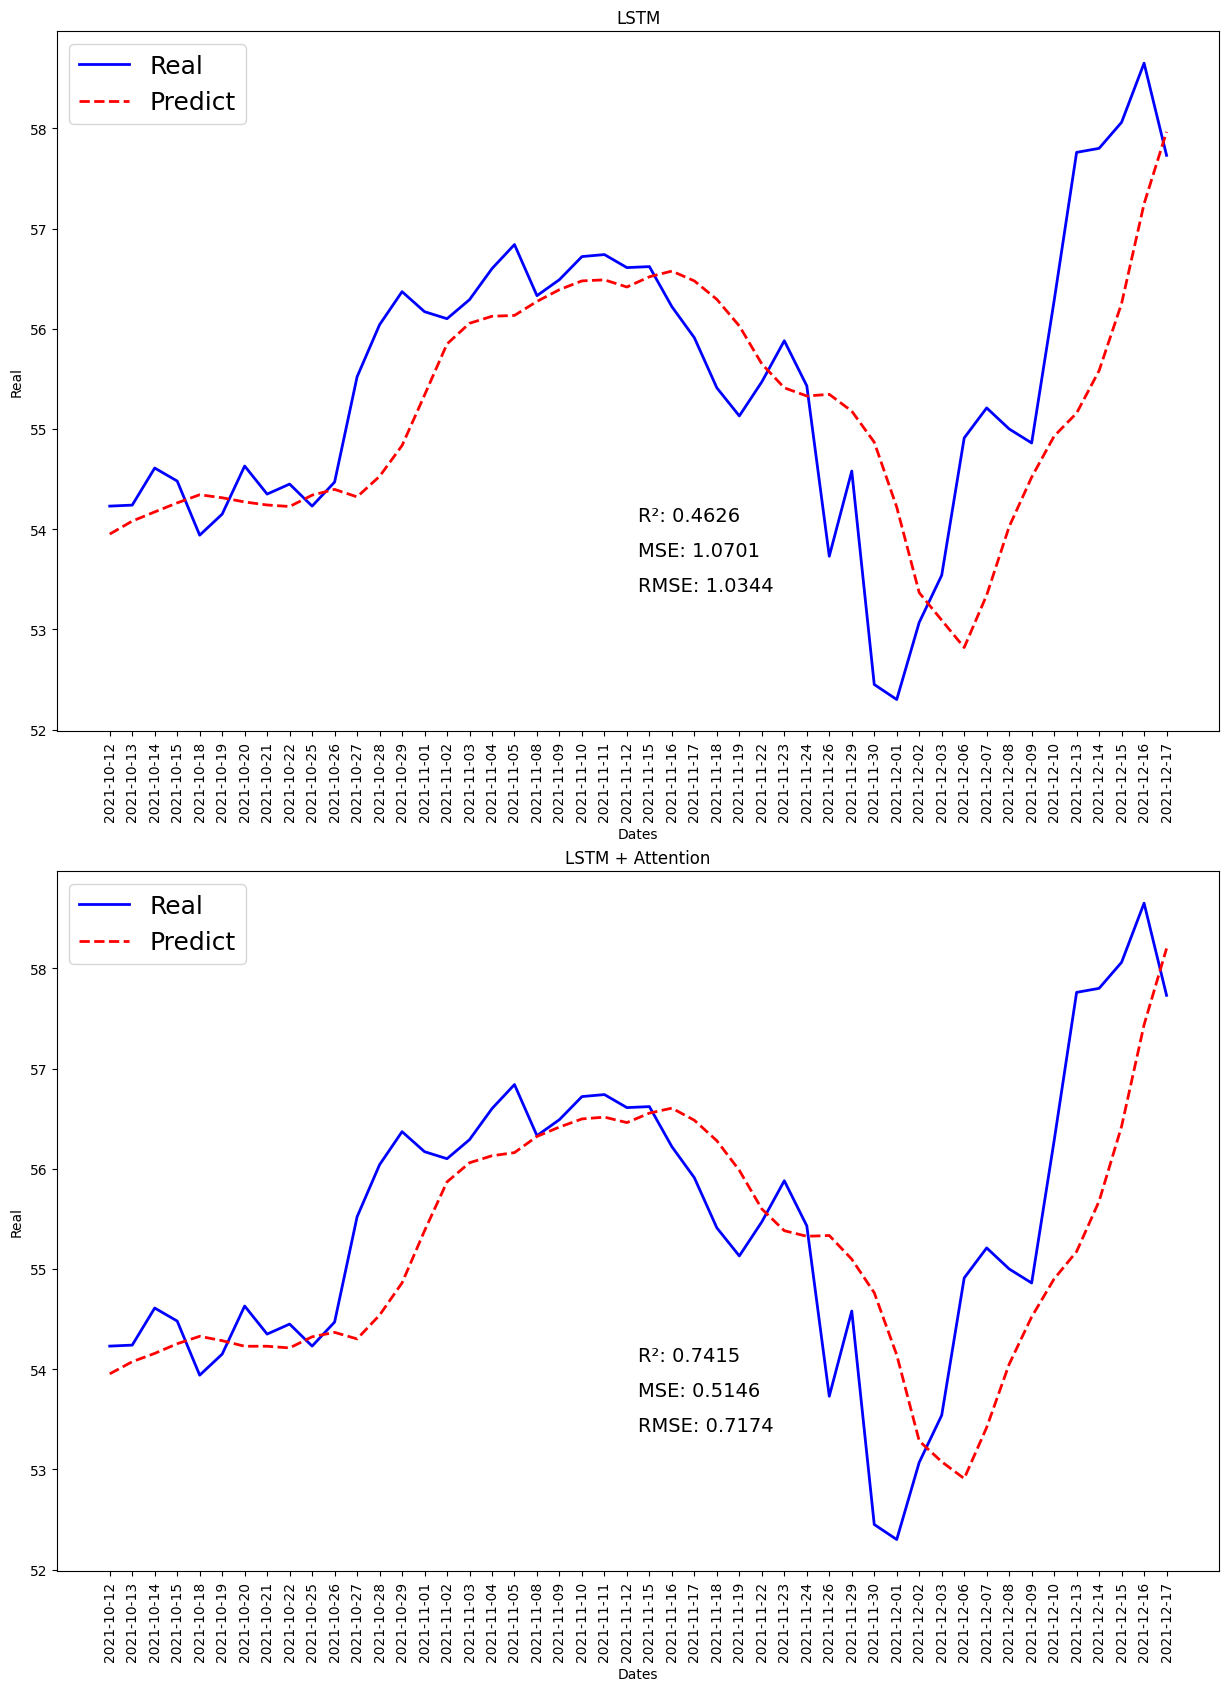

In [54]:
# Create subplots with two rows and one column
fig, ax = plt.subplots(2, 1, figsize=(15, 20))

# Plot Real and Predicted values for LSTM
sns.lineplot(x='Dates', y='Real', data=df_plot_lstm, label='Real', color='blue', ax=ax[0], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_lstm, label='Predict', color='red', linestyle='dashed', ax=ax[0], linewidth=2)

# Plot Real and Predicted values for LSTM with Attention
sns.lineplot(x='Dates', y='Real', data=df_plot_lstm_attention, label='Real', color='blue', ax=ax[1], linewidth=2)
sns.lineplot(x='Dates', y='Predict', data=df_plot_lstm_attention, label='Predict', color='red', linestyle='dashed', ax=ax[1], linewidth=2)

# Display R-squared, MSE, and RMSE values for LSTM
ax[0].text(0.5, 0.30, f'R²: {r2_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.25, f'MSE: {mse_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.20, f'RMSE: {rmse_lstm:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)

# Display R-squared, MSE, and RMSE values for LSTM with Attention
ax[1].text(0.5, 0.30, f'R²: {r2_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.25, f'MSE: {mse_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.20, f'RMSE: {rmse_rnn:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)

# Set titles for the subplots
ax[0].set_title('LSTM')
ax[1].set_title('LSTM + Attention')

# Add legends to the subplots
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)

# Rotate x-axis labels for better visibility
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

# Display the plot
plt.show()


2/2 [==============================] - 0s 10ms/step


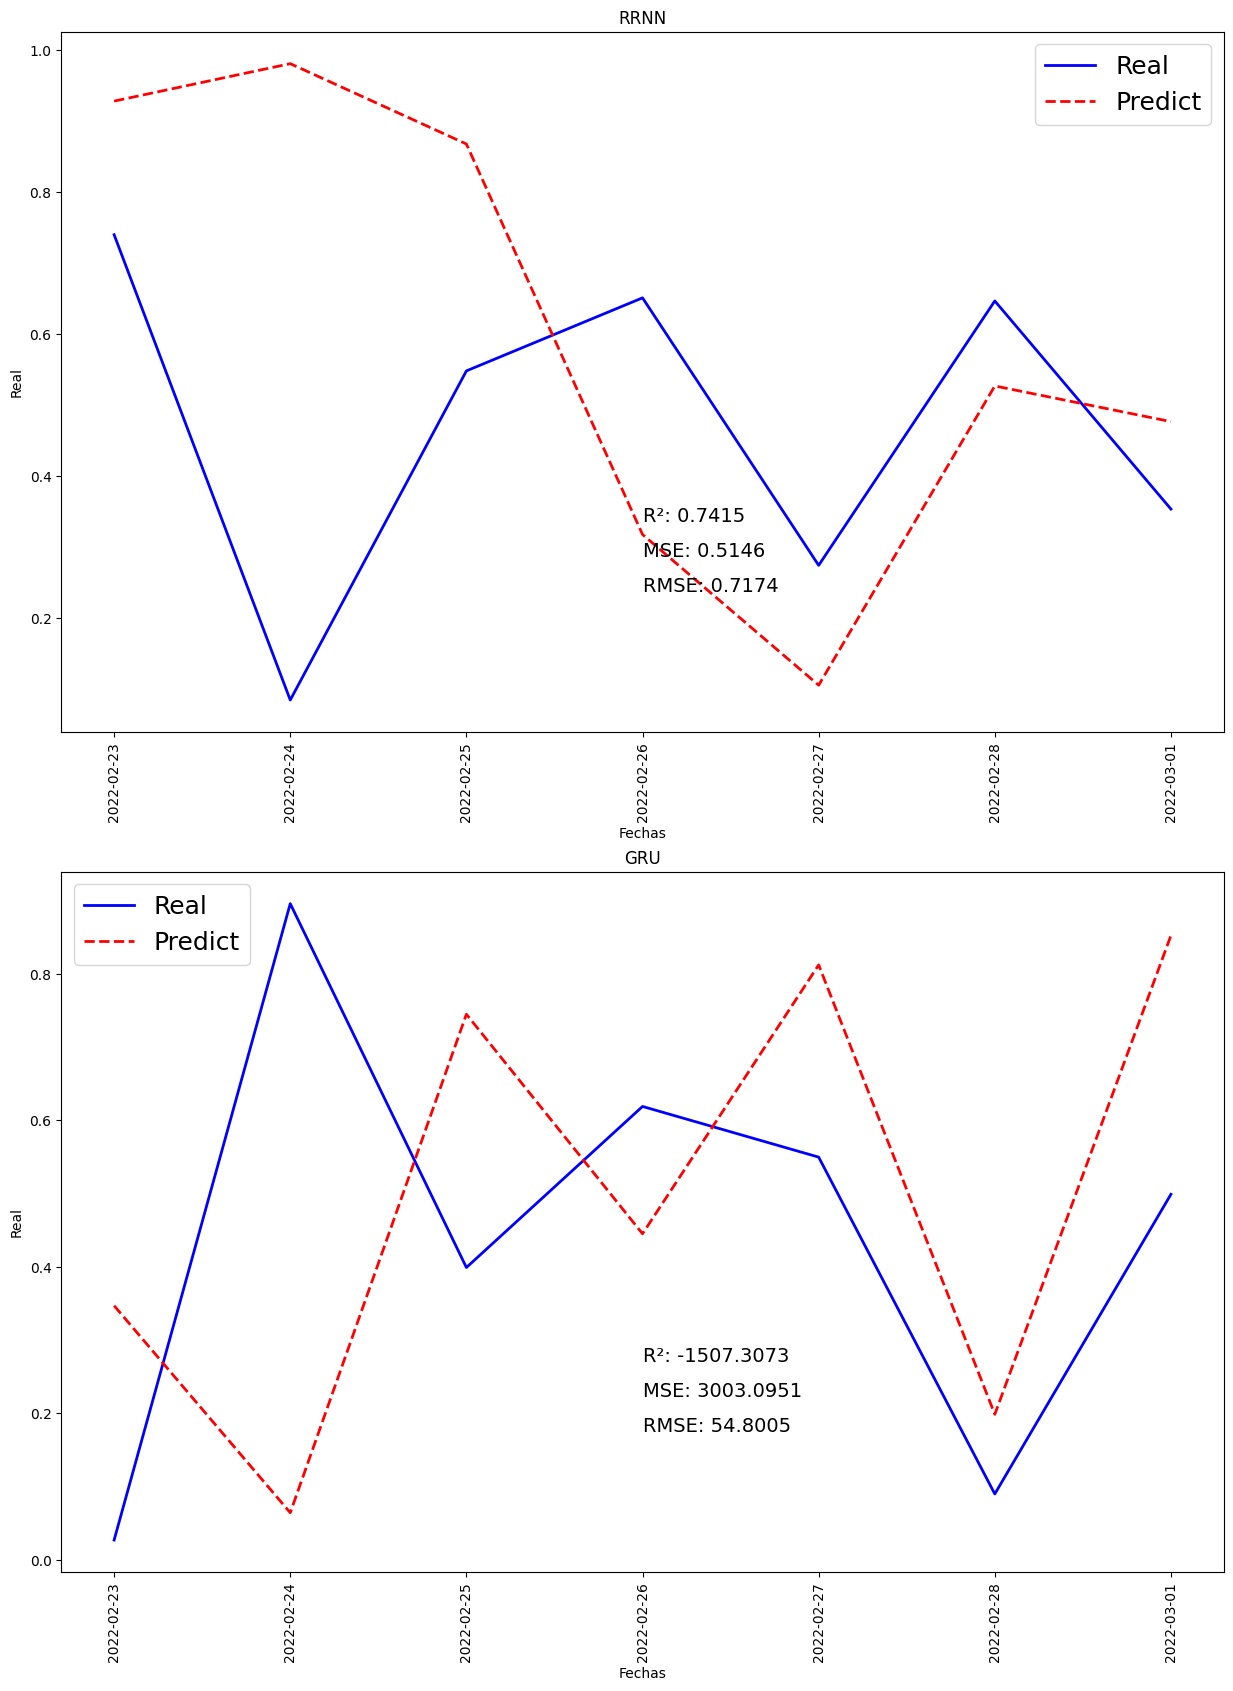

In [60]:
# Assuming you have trained the GRU model and obtained predictions
# Replace this with your actual code for training and prediction
predictions_GRU = model_gru.predict(X_test)
y_test_GRU = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate metrics for the GRU model
mse_GRU = mean_squared_error(y_test_GRU, predictions_GRU)
r2_GRU = r2_score(y_test_GRU, predictions_GRU)
rmse_GRU = mean_squared_error(y_test_GRU, predictions_GRU, squared=False)

# Visualization code
fig, ax = plt.subplots(2, 1, figsize=(15, 20))
sns.lineplot(x='Fechas', y='Real', data=df_plot_RNN, label='Real', color='blue', ax=ax[0], linewidth=2)
sns.lineplot(x='Fechas', y='Predict', data=df_plot_RNN, label='Predict', color='red', linestyle='dashed', ax=ax[0], linewidth=2)
ax[0].text(0.5, 0.30, f'R²: {r2_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.25, f'MSE: {mse_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)
ax[0].text(0.5, 0.20, f'RMSE: {rmse_rnn:.4f}', fontsize=14, color='black', transform=ax[0].transAxes)

sns.lineplot(x='Fechas', y='Real', data=df_plot_GRU, label='Real', color='blue', ax=ax[1], linewidth=2)
sns.lineplot(x='Fechas', y='Predict', data=df_plot_GRU, label='Predict', color='red', linestyle='dashed', ax=ax[1], linewidth=2)
ax[1].text(0.5, 0.30, f'R²: {r2_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.25, f'MSE: {mse_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)
ax[1].text(0.5, 0.20, f'RMSE: {rmse_GRU:.4f}', fontsize=14, color='black', transform=ax[1].transAxes)

# Set titles, legends, and rotate x-axis labels
ax[1].set_title('GRU')
ax[0].set_title('RRNN')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()


## **END**


